# PROYECTO FINAL: ROSTROS

### Integrantes: Edgar Perez, Fernanda Arelle, Patricio Barber, Ian Carbajal, Dara Meneses

##### ** Importaciones de directorios usados y otras herramientas

In [87]:
from PIL import Image
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import scipy.linalg
import random
from random import sample
from os import listdir,mkdir

<div class="alert alert-info">
    
1. Descarga un conjunto de prueba del LFW, verifica que todos las imagenes están estandarizadas en tamaño y vienen en escala de grises. Tiene que haber 10 clases. Guarda estas imágenes en una carpeta llamada originales. Esto es muy importante, ya que los resultados deben de ser reproducibles.

<div>

<div class="alert alert-info">
    
2. Describe las imagenes obtenidas ¿Cuáles son las etiquetas? ¿Cuántas imágenes hay de cada etiqueta? Crea carpetas con los nombres de las etiquetas y guarda las imágenes correspondientes ahí.

<div>

##### 1- Se crea el directorio/carpeta "Originales"
##### 2- El archivo de Usables se convierte en la lista de nombres llamada "etiquetas"
##### 3- Se crean subdirectorios análogos para **cada** elemento de la lista etiquetas
##### 4- Hace arrays a las imágenes y las convierte a escalas de grises
##### 5- Las guarda como npy en el directorio que le corresponde
##### 6- Guarda en el nombre de cada etiqueta (como variable de python) los paths relativos de las imágenes que le corresponden.
##### 7- Guarda en la variable "originales" los paths de todas las imágenes.

In [77]:
mkdir("Originales") #1
etiquetas = listdir("Usables") #2
for etiqueta in etiquetas: #3
    mkdir('Originales/'+etiqueta)
    imgs = listdir("Usables/"+etiqueta)
    for img in imgs: 
        imgarr = np.dot(np.asarray(Image.open("Usables/"+etiqueta+ "/" +img)),np.array([0.21,0.72,0.07])).astype("uint8") #4
        np.save("Originales/"+etiqueta+ "/" +img[:-4],imgarr[70:-70,70:-70]) #5

In [78]:
for etiqueta in etiquetas:
    exec(etiqueta + "=" + "['Originales/' + etiqueta + '/' + x for x in listdir('Originales/' + etiqueta)]") #6
    #exec: se le pasa un str y lo ejecuta
originales = [x for y in [eval(etiqueta) for etiqueta in etiquetas] for x in y] #7

### Respuestas: 
##### ¿Cuáles son las etiquetas?

In [79]:
etiquetas

['Gerhard_Schroeder',
 'Tony_Blair',
 'Jean_Chretien',
 'Donald_Rumsfeld',
 'Colin_Powell',
 'Hugo_Chavez',
 'Junichiro_Koizumi',
 'Ariel_Sharon',
 'George_W_Bush',
 'John_Ashcroft']

In [80]:
George_W_Bush

['Originales/George_W_Bush/George_W_Bush_0071.npy',
 'Originales/George_W_Bush/George_W_Bush_0065.npy',
 'Originales/George_W_Bush/George_W_Bush_0059.npy',
 'Originales/George_W_Bush/George_W_Bush_0273.npy',
 'Originales/George_W_Bush/George_W_Bush_0515.npy',
 'Originales/George_W_Bush/George_W_Bush_0501.npy',
 'Originales/George_W_Bush/George_W_Bush_0267.npy',
 'Originales/George_W_Bush/George_W_Bush_0529.npy',
 'Originales/George_W_Bush/George_W_Bush_0298.npy',
 'Originales/George_W_Bush/George_W_Bush_0307.npy',
 'Originales/George_W_Bush/George_W_Bush_0461.npy',
 'Originales/George_W_Bush/George_W_Bush_0475.npy',
 'Originales/George_W_Bush/George_W_Bush_0313.npy',
 'Originales/George_W_Bush/George_W_Bush_0449.npy',
 'Originales/George_W_Bush/George_W_Bush_0105.npy',
 'Originales/George_W_Bush/George_W_Bush_0111.npy',
 'Originales/George_W_Bush/George_W_Bush_0139.npy',
 'Originales/George_W_Bush/George_W_Bush_0138.npy',
 'Originales/George_W_Bush/George_W_Bush_0110.npy',
 'Originales

##### ¿Cuántas imágenes hay de cada etiqueta?

In [81]:
print("Imágenes de Bush:",len(listdir("Usables/"+'George_W_Bush')))
print("Imágenes de Schroeder:",len(listdir("Usables/"+'Gerhard_Schroeder')))
print("Imágenes de Blair:",len(listdir("Usables/"+'Tony_Blair')))
print("Imágenes de Chretien:",len(listdir("Usables/"+'Jean_Chretien')))
print("Imágenes de Rumsfeld:",len(listdir("Usables/"+'Donald_Rumsfeld')))
print("Imágenes de Powell:",len(listdir("Usables/"+'Colin_Powell')))
print("Imágenes de Chavez:",len(listdir("Usables/"+'Hugo_Chavez')))
print("Imágenes de Koizumi:",len(listdir("Usables/"+'Junichiro_Koizumi')))
print("Imágenes de Sharon:",len(listdir("Usables/"+'Ariel_Sharon')))
print("Imágenes de Ashcroft:",len(listdir("Usables/"+'John_Ashcroft')))

Imágenes de Bush: 530
Imágenes de Schroeder: 109
Imágenes de Blair: 144
Imágenes de Chretien: 55
Imágenes de Rumsfeld: 121
Imágenes de Powell: 236
Imágenes de Chavez: 71
Imágenes de Koizumi: 60
Imágenes de Sharon: 77
Imágenes de Ashcroft: 53


#### Ejemplo: cómo se ve el arreglo de la última imagen cargada convertida en np

In [82]:
imgarr 

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 3,  0, 17, ...,  0,  0,  0],
       [ 1,  0, 18, ...,  0,  0,  0],
       [ 1,  0, 18, ...,  0,  0,  0]], dtype=uint8)

<div class="alert alert-info">
    
3. Crea una función que muestre en una matriz de imágenes de mxn un conjunto aleatorio del conjunto de datos en originales.

<div>

##### 1. Creamos función que recibe paths 
##### 2. Se hace una matriz vacía de 110^2 por la longitud del path
##### 3. Se convierte a cada una de las imagenes en una sola columna
##### 4. Regresa el array (110^2 filas y tantas columnas como número de imágenes) de todas las imágenes juntas

In [83]:
def bigarr(paths): #1
    arr = np.empty((110**2,len(paths))) #2
    for i in range(len(paths)):
        arr[:,i] = np.load(paths[i]).reshape(110**2,) #3
    return arr #4

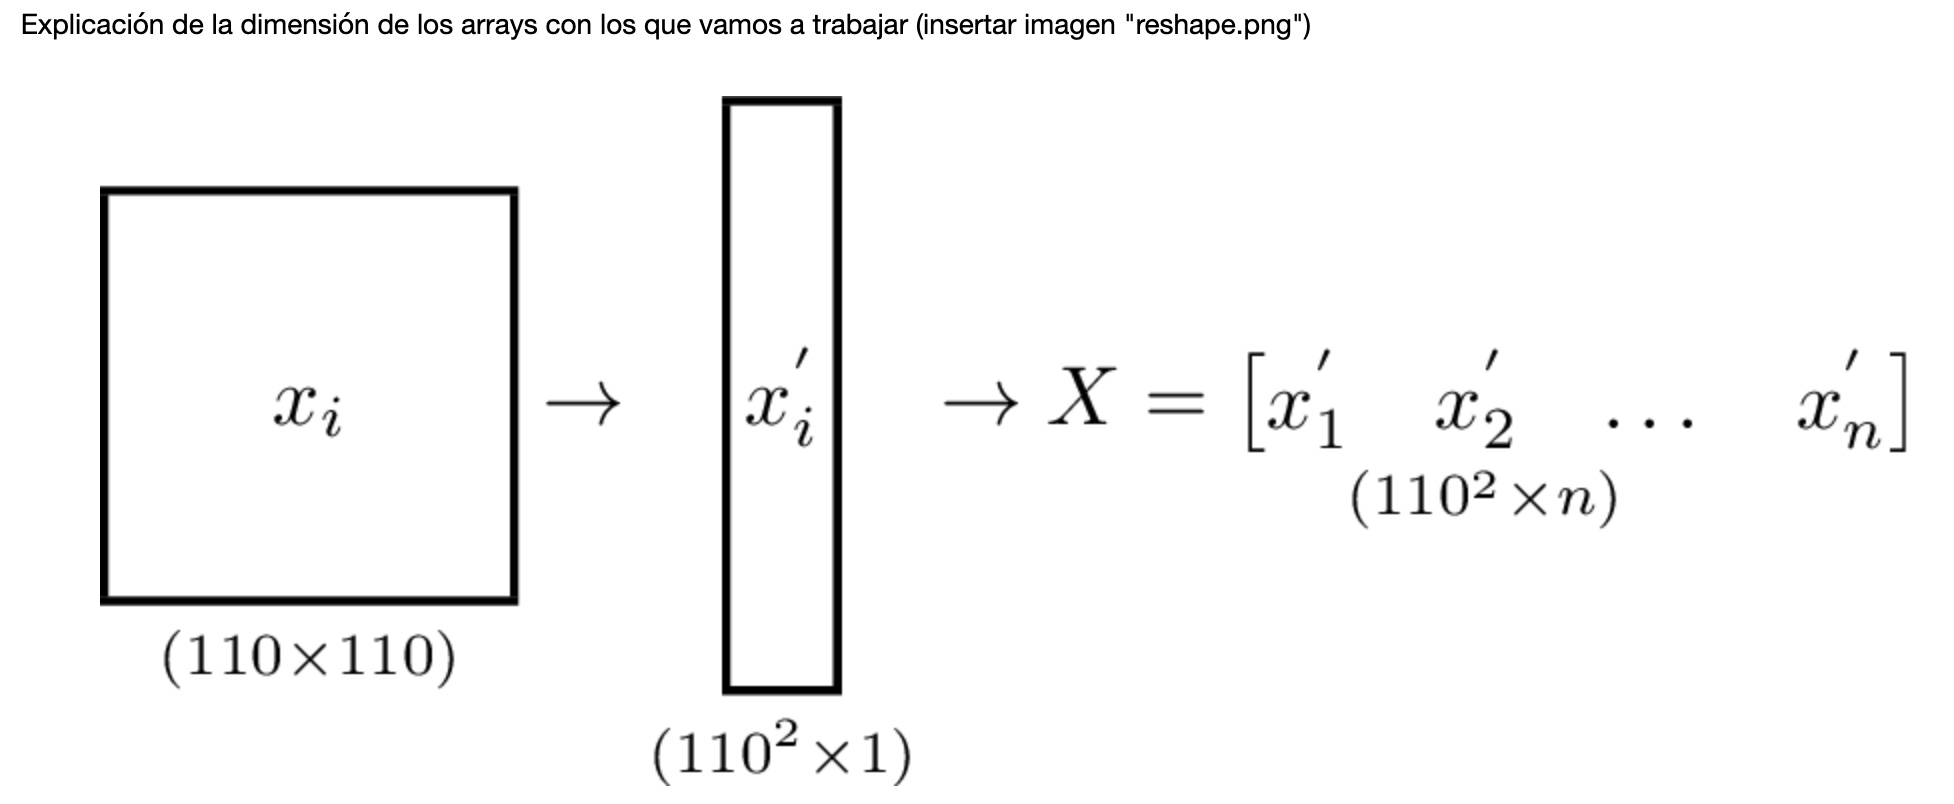

In [84]:
from pylab import *
from IPython.display import display
from IPython.display import Image as IM
i = IM(filename = './reshape.png')
display(i)

##### 1. Recibe una colección de paths, m y n
##### 2. Muestra una matriz (de tamaño mxn) de imágenes tomadas aleatoriamente de los paths.
##### 3. Graficamos 
##### 4. Cuenta cuántas veces sale Bush (Es muy probable que Bush salga varias veces xd)

In [85]:
#Recibe una colección de paths,m y n. Muestra una matriz (de tamaño mxn) de imágenes tomadas aleatoriamente de los paths.
#Es muy probable que Bush salga varias veces xd
def muestra(paths,m,n, Bush=False):
    imgs = random.sample(paths,(m*n))
    plt.figure()
    f, axarray = plt.subplots(m,n,figsize=(15,15))
    for i in range(m*n):
        exec("axarray[i//n,i%n].imshow(np.load(imgs[i]),cmap='gray')")
        exec("axarray[i//n,i%n].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)")
    plt.show()
    if Bush==True: #contar cuántas veces sale Bush xd
        bushcount = len([x for x in imgs if "Bush" in x])
        print("¡Bush aparece " + str(bushcount) + " veces!")

#### Ejemplo de la función: colección aleatoria de imágenes

<Figure size 432x288 with 0 Axes>

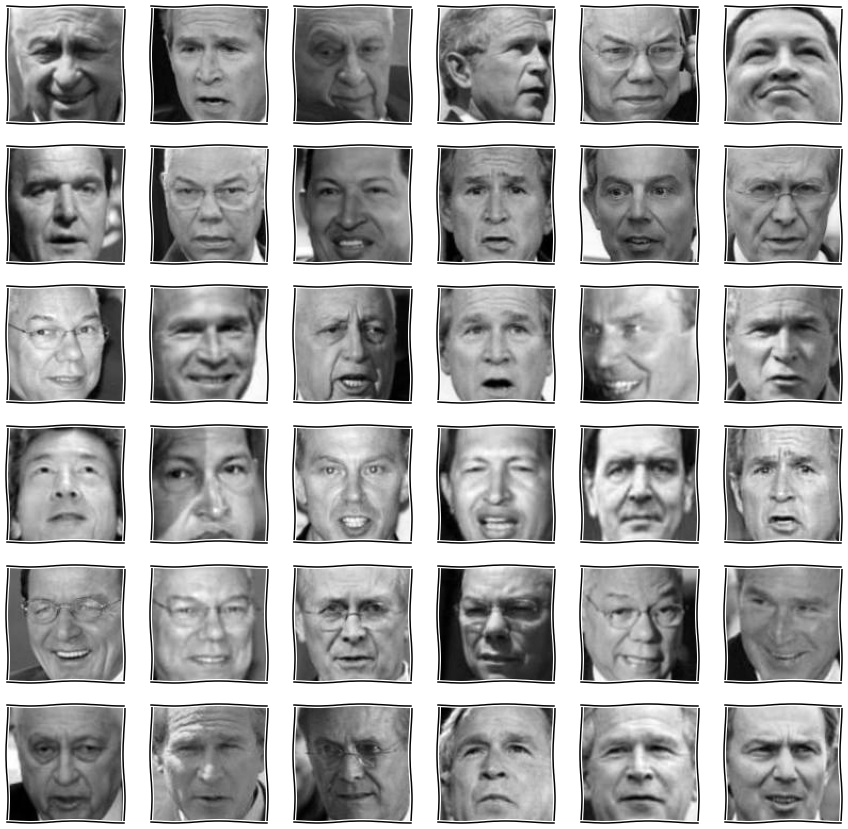

¡Bush aparece 11 veces!


In [88]:
muestra(originales,6,6,Bush=True)

#### OBSERVACIÓN: en caso de que el código anterior marque error, vuelva a correr la primera celda del archivo (celda **)

<div class="alert alert-info">
    
4. Crea una función que calcule el rostro promedio de un personaje en particular.

<div>


##### Recibe un array (el big array) de un personaje  y regresa el array promedio correspondiente a esa colección.

## ¿Cómo se calcula la imagen promedio?
<font size="4">$\mu = $ Imagen promedio</font></br>
<font size="4">$x_{i} = $ iésima imagen de la colección </font></br>
<font size="4"> $n= $ número de imágenes en la colección</font>

$$\Large \mu = \frac{1}{n}\sum_{i=1}^{n} x_i$$

In [89]:
#Recibe una array de caras y regresa la imagen promedio correspondiente a esa colección.
def mean_face(personaje):
    x = np.zeros((110**2,1))
    for i in range(personaje.shape[-1]):
        x = x + personaje[:,i].reshape((110**2,1))
    return x/personaje.shape[-1]
    

#### Ejemplo de la función: colección aleatoria de imágenes

In [90]:
mean_face(bigarr(eval('George_W_Bush')))

array([[97.44150943],
       [97.75283019],
       [98.82264151],
       ...,
       [89.13962264],
       [89.0245283 ],
       [89.06792453]])

<div class="alert alert-info">
    
7. De cada etiqueta, separala en dos grupos, uno de entrenamiento (cada personaje con el mismo número de imagenes) y uno de prueba (el restante).    
<div>

##### Crea dos particiones aleatorias para cada etiqueta: una de entrenamiento y otra de prueba. En este caso, cada conjunto de entrenamiento tiene 53 caras 

##### - Ejemplo: para la etiqueta George_W_Bush se crean las listas George_W_Bush_tr (entrenamiento) y George_W_Bush_pr (prueba)

In [91]:
for etiqueta in etiquetas:
    imgs = eval(etiqueta)
    tr = random.sample(imgs,53)
    pr = [x for x in imgs if x not in tr]
    exec(etiqueta + "_tr = tr")
    exec(etiqueta + "_pr = pr")

#### Ejemplo: imágenes de Bush para entrenamiento

In [92]:
George_W_Bush_tr

['Originales/George_W_Bush/George_W_Bush_0073.npy',
 'Originales/George_W_Bush/George_W_Bush_0023.npy',
 'Originales/George_W_Bush/George_W_Bush_0404.npy',
 'Originales/George_W_Bush/George_W_Bush_0324.npy',
 'Originales/George_W_Bush/George_W_Bush_0228.npy',
 'Originales/George_W_Bush/George_W_Bush_0466.npy',
 'Originales/George_W_Bush/George_W_Bush_0468.npy',
 'Originales/George_W_Bush/George_W_Bush_0411.npy',
 'Originales/George_W_Bush/George_W_Bush_0210.npy',
 'Originales/George_W_Bush/George_W_Bush_0443.npy',
 'Originales/George_W_Bush/George_W_Bush_0344.npy',
 'Originales/George_W_Bush/George_W_Bush_0137.npy',
 'Originales/George_W_Bush/George_W_Bush_0223.npy',
 'Originales/George_W_Bush/George_W_Bush_0071.npy',
 'Originales/George_W_Bush/George_W_Bush_0433.npy',
 'Originales/George_W_Bush/George_W_Bush_0241.npy',
 'Originales/George_W_Bush/George_W_Bush_0494.npy',
 'Originales/George_W_Bush/George_W_Bush_0357.npy',
 'Originales/George_W_Bush/George_W_Bush_0032.npy',
 'Originales

#### Ejemplo: imágenes de Bush para prueba

In [93]:
George_W_Bush_pr

['Originales/George_W_Bush/George_W_Bush_0065.npy',
 'Originales/George_W_Bush/George_W_Bush_0059.npy',
 'Originales/George_W_Bush/George_W_Bush_0273.npy',
 'Originales/George_W_Bush/George_W_Bush_0515.npy',
 'Originales/George_W_Bush/George_W_Bush_0501.npy',
 'Originales/George_W_Bush/George_W_Bush_0267.npy',
 'Originales/George_W_Bush/George_W_Bush_0529.npy',
 'Originales/George_W_Bush/George_W_Bush_0298.npy',
 'Originales/George_W_Bush/George_W_Bush_0307.npy',
 'Originales/George_W_Bush/George_W_Bush_0461.npy',
 'Originales/George_W_Bush/George_W_Bush_0475.npy',
 'Originales/George_W_Bush/George_W_Bush_0313.npy',
 'Originales/George_W_Bush/George_W_Bush_0449.npy',
 'Originales/George_W_Bush/George_W_Bush_0111.npy',
 'Originales/George_W_Bush/George_W_Bush_0139.npy',
 'Originales/George_W_Bush/George_W_Bush_0138.npy',
 'Originales/George_W_Bush/George_W_Bush_0110.npy',
 'Originales/George_W_Bush/George_W_Bush_0104.npy',
 'Originales/George_W_Bush/George_W_Bush_0448.npy',
 'Originales

<div class="alert alert-info">
    
6. Guarda los rostros promedios en una carpeta promedios usando el nombre de la etiqueta.    
<div>

###### Crea la carpeta "Promedios" y guarda las caras promedio del conjunto de entrenamiento de cada uno de los personajes
### IMPORTANTE
##### En este paso calculamos el promedio a partir del conjunto de entrenamiento, no del conjunto original, ya que así se definía en el artículo de la bibliografía.

In [94]:
mkdir("Promedios")
for etiqueta in etiquetas:
    np.save("Promedios/"+etiqueta,mean_face(bigarr(eval(etiqueta+"_tr"))))

<div class="alert alert-info">
    
5. Crea una función que muestre el rostro promedio de un personaje en particular.
    
<div>

##### Se define una nueva función que muestra la imagen promedio de un personaje en particular. Se requiere que exista la carpeta "Promedios" y los arrays de cada etiqueta

In [95]:
def mostrar_promedio(personaje):
    plt.imshow(np.load("Promedios/" + personaje + ".npy").reshape(110,110),cmap="gray")
    plt.title(" ".join(personaje.split("_")))
    plt.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

#### Ejemplo de la función

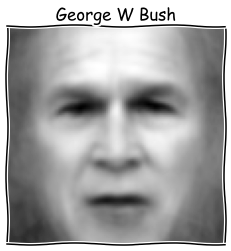

In [96]:
mostrar_promedio('George_W_Bush')

<div class="alert alert-info">
    
8. Crea una matriz $\mathcal{M}$ con las imagenes de entrenamiento puestas en un vector.   
<div>

##### Despliega las listas: los que terminan en "tr" están entrenamiento y los que terminan en "pr" en pruebas

In [97]:
entrenamiento = [x for y in [eval(etiqueta+"_tr") for etiqueta in etiquetas] for x in y] 
prueba = [x for y in [eval(etiqueta+"_pr") for etiqueta in etiquetas] for x in y]

##### 1- Se crean los arrays trset y prset a partir de la función bigarr que recibe los paths -tanto de entrenamiento como de prueba-
##### 2- Se calcula la mean_face de cada elemento del conjunto de entrenamiento

In [98]:
#1
trset = bigarr(entrenamiento)
prset = bigarr(prueba)
trset.shape #se tiene una matríz de 12100 (110*110) filas y 530 (cantidad de imágenes de entrenamiento) columnas
#2
meanface = mean_face(trset) 

## ¿Cómo se calcula la matriz de caricaturas?
<font size="4"> $\phi_{i} = $ iésima caricatura</font></br>
<font size="4">$\mu = $ Imagen promedio</font></br>
<font size="4">$x_{i}^{'} = $ iésima imagen de la colección </font></br>
<font size="4"> $n= $ número de imágenes en la colección</font>

$$\Large \phi_{i} = x_{i}^{'} - \mu \rightarrow A = \left[ \begin{matrix} \phi_{1} & \phi_{2} & \dots & \phi_{n}\end{matrix} \right]$$


<font size="4">La matriz $A$ es de dimensión $110^{2} \times n$ y cada una de sus columnas es una caricatura. A partir de la matriz de caricaturas se define la **matriz de correlación** $C$</font>

$$\Large C = A A^{T}$$

<font size="4">Queremos hallar ahora los k eigenvectores más significativos de $C$ (ordenados de acuerdo al eigenvalor que les corresponde). Sin embargo, $C$ es una matriz de dimensión $110^{2} \times 110^{2}$. Sería demasiado costoso calcular sus eigenvectores, pero se puede simplificar la tarea con la fórmula que sigue:</font>

$$\Large A^{T}Au_{i}  = \lambda_{i}u_{i} $$
$$\Large AA^{T}Au_{i}  = \lambda_{i}Au_{i}$$
$$\Large CAu_{i}  =  \lambda_{i}Au_{i}$$

<font size="4">En otras palabras, si $u_{i}$ y $\lambda_{i}$ son un eigenvector y un eigenvalor (respectivamente) de $A^{T}A$, entonces $Au_{i}$ y $\lambda_{i}$ lo son de $AA^{T}$. El problema se reduce entonces a hallar los k eigenvectores más significativos de $A^{T}A$, cuya dimensión es $n \times n$. Cada una de las $Au_{i}$ representa una **eigencara**.</font> 

##### 3- Se crea la matriz M de caricaturas, la cual está definida por la diferencia entre cada una de las caras menos sus promedios correspondientes

In [99]:
#3
caricaturas = trset-meanface #cada una de las caras menos el promedio: MATRÍZ M

<div class="alert alert-info">
    
9. Calcula la matriz de correlación $\mathcal{C} = \mathcal{M}^T\mathcal{M}$.     
<div>

In [100]:
CovMat = np.matmul(caricaturas.transpose(),caricaturas) #Matriz de correlación

### Respuestas: 
##### ¿Por qué es una matriz de correlación?

Cada elemento de la matriz es la correlación. 
Si tienes 2 variables la diagonal es la covarianza de cada una de las variables y los demás elementos son las correlaciones. Los subíndices de la matriz señalan la covarianza de los elementos a comparar
ej: a12 es la covarianza de y1 y y2


- Multiplicar una matriz por su transpuesta
- Salcular matriz covarianza: matriz Qnxn ortonormal y una diagonal con eigenvalores la multiplicación te da la de covarianza
- COVMAT=QDQ^T --> descomposición espectral

<div class="alert alert-info">
    
10. Obtén los primeros $30$ vectores y valores propios de $\mathcal{C}$. 
<div>

##### Eigenvectores y eigenvalores 
Se seleccionan los 30 eigenvectores y eigenvalores más grandes

In [101]:
eigenvals, eigenvecs = scipy.linalg.eig(CovMat)
orden = eigenvals.argsort()
seigenvecs = eigenvecs[:,orden[::-1][:30]] 
seigenvals = eigenvals[orden[::-1][:30]] 

#### Ejemplo

In [102]:
seigenvecs

array([[ 0.04822735, -0.04367474,  0.04227579, ..., -0.05826969,
        -0.01893916,  0.02284525],
       [-0.02235895, -0.05776758, -0.01122568, ..., -0.00813282,
         0.02347759,  0.01361861],
       [ 0.05860901,  0.01269013,  0.03480501, ..., -0.02745563,
        -0.1145612 ,  0.0557254 ],
       ...,
       [ 0.01854263, -0.06002639,  0.02069259, ...,  0.02738131,
         0.06184139,  0.04569615],
       [-0.02110385,  0.01428527, -0.03466959, ..., -0.06106733,
        -0.00103603,  0.04752575],
       [-0.02025014,  0.00311626, -0.08923873, ..., -0.03287936,
         0.09211165,  0.00993045]])

In [103]:
seigenvals

array([2.28288840e+09+0.j, 2.05096243e+09+0.j, 1.29610270e+09+0.j,
       7.28168461e+08+0.j, 4.91413863e+08+0.j, 3.50399673e+08+0.j,
       2.74352888e+08+0.j, 2.52804017e+08+0.j, 1.81558057e+08+0.j,
       1.68024642e+08+0.j, 1.52658788e+08+0.j, 1.44759515e+08+0.j,
       1.16606627e+08+0.j, 1.12491173e+08+0.j, 1.04561399e+08+0.j,
       1.01368549e+08+0.j, 8.13689975e+07+0.j, 7.96641074e+07+0.j,
       7.30799638e+07+0.j, 7.18288247e+07+0.j, 6.83286851e+07+0.j,
       6.60786254e+07+0.j, 6.27423519e+07+0.j, 6.12893841e+07+0.j,
       5.82783697e+07+0.j, 5.06528006e+07+0.j, 5.00259212e+07+0.j,
       4.84739697e+07+0.j, 4.63200115e+07+0.j, 4.34595842e+07+0.j])

<div class="alert alert-info">
    
11. Toma cada uno de los vectores propios y muéstralos como imagen.   
<div>

##### 1- Se crea un array llamado eigenfaces vacío de dimensiones (110**2, 30)
##### 2- Se define cada columna del array eigenfaces como la multiplicación de las matrices caricaturas y los eigenvectores. Al hacer esta multiplicación se obtiene la Matriz de Eigencaras

In [104]:
eigenfaces = np.empty((110**2,seigenvecs.shape[-1])) #1
for i in range(seigenvecs.shape[-1]):
    eigenfaces[:,i] = np.matmul(caricaturas,seigenvecs[:,i]) #2

##### 3- Mostrando los 30 primeros eigenvectores como imágenes

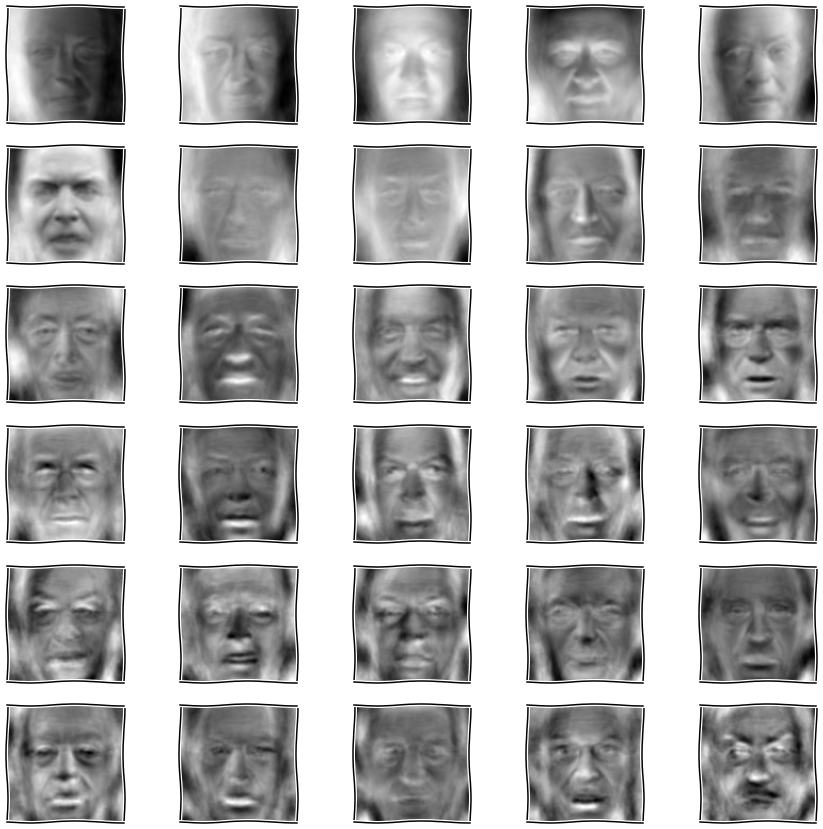

In [105]:
f, axarr = plt.subplots(6,5,figsize=(15,15))
for i in range(eigenfaces.shape[-1]):
    exec("axarr[i//5,i%5].imshow(eigenfaces[:,i].reshape(110,110),cmap='gray')")
    exec("axarr[i//5,i%5].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)")

<div class="alert alert-info">
    
12. Muestra en una gráfica los valores propios, ordenados de mayor a menor.
<div>

##### Verificamos las dimensiones de los valores propios los cuales están guardados como seigenvals 

In [106]:
seigenvals.shape

(30,)

##### Dado que queremos graficar en R^2, tenemos que hacer un reshape para que quede un arreglo unidimensional

In [107]:
graf_eigenvals=seigenvals.reshape(30)

##### Se grafica

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


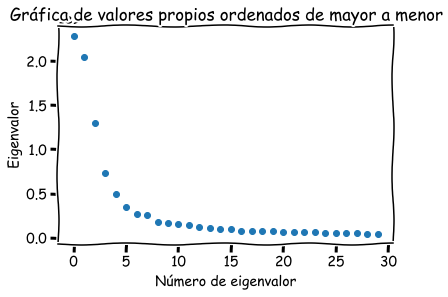

In [108]:
plt.xkcd()
plt.scatter(range(0,30),graf_eigenvals)
plt.title("Gráfica de valores propios ordenados de mayor a menor")
plt.xlabel("Número de eigenvalor")
plt.ylabel("Eigenvalor")
plt.show()

<div class="alert alert-info">
    
13. Crea una función que calcule la representación de una imagen en los vectores propios. Esto se hace tomando la proyección de la imagen en los vectores propios.
<div>

##### Se saca el producto punto de cada una de las eigencaras con una caricatura en específico. Esto regresa un coeficiente el cual es el peso que le corresponde a cada eigencara para reconstruir la cara que le dimos al principio

##### 1- Se crea una lista vacía donde se guardarán los coeficientes
##### 2- Se transforma la cara en caricatura
##### 3- Producto punto = Proyección de la imagen en los vectores propios

In [109]:
def encode(cara,promedio,eigencaras):
    coef = [] #1
    caric = cara-promedio.reshape((110**2,)) #2
    for i in range(eigencaras.shape[-1]):
        coef.append(caric.dot(eigencaras[:,i])) 
    return coef

<div class="alert alert-info">
    
14. Utiliza esa función con las imágenes promedio, esto te da la representación única de cada personaje. Dibuja los coeficientes de esta proyección en una gráfica, esto de da la firma de cada personaje.

##### Representación única de cada personaje

In [110]:
firmas = [[etiqueta, np.asarray(encode(np.load("Promedios/"+etiqueta+".npy").reshape((110**2,)),meanface,eigenfaces))] for etiqueta in etiquetas]

In [111]:
firmas

[['Gerhard_Schroeder',
  array([ 2.40840885e+07, -1.45767384e+07,  1.14430101e+07,  1.09516413e+07,
         -1.80276735e+06,  8.48402410e+06, -6.52777208e+04,  2.01696126e+06,
          5.22818556e+05, -9.98833113e+05, -1.26159692e+06,  1.35520796e+06,
          3.80453539e+06, -2.89275576e+06,  1.49158827e+06,  6.98418726e+05,
          6.17806132e+05,  3.59677801e+05,  1.99377773e+04,  1.91777187e+06,
         -4.77613314e+05,  3.78514503e+05, -8.29038315e+03,  9.98302993e+05,
         -6.03281086e+05, -3.23150678e+05, -1.33066706e+05,  2.57032312e+05,
         -1.10728134e+06,  6.38916748e+04])],
 ['Tony_Blair',
  array([ 9.00125648e+06, -3.63258415e+07,  5.53368707e+06, -6.13715500e+06,
         -1.62266265e+06,  8.01525077e+06,  1.26638412e+06,  1.04067075e+06,
         -6.09933233e+05,  1.43862175e+05, -1.56376237e+06,  1.57992817e+06,
          1.11456511e+06, -7.37025384e+05, -7.80168859e+03, -2.26528192e+06,
         -3.74047481e+05,  8.52357574e+05,  5.21841672e+04,  8.72384

##### Gráfica

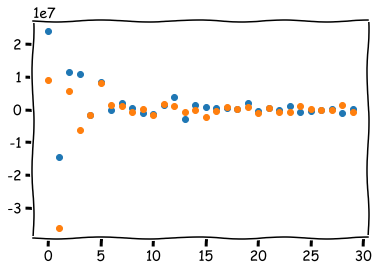

In [112]:
for i in range(np.array(firmas).shape[-1]):
    plt.scatter(range(0,30),firmas[i][1])

<div class="alert alert-info">
    
14.ª Determinar el parentezco que tienen cada cara con las etiquetas a partir de sus coeficiente
    
<div>

##### Firma de cada personaje -> determinar las clases con las que se indetifica / que tanto se parece una cara a cada uno de los personajes
##### IMPORTANTE: la firma proviene del promedio del conjunto de entrenamiento 

In [113]:
def comparar(nueva_cara):
    caric = nueva_cara-meanface.reshape((110**2,))
    firma_nueva = encode(caric,meanface,eigenfaces)
    return [(x[0],np.linalg.norm(firma_nueva-x[1])) for x in firmas]

#### Ejemplo del funcionamiento de la función

##### Los resultados son la norma euclidiana del eigenvector de la imagen nueva con la firma de cada individuo

In [114]:
comparar(np.load(prueba[256]).reshape(12100,))

[('Gerhard_Schroeder', 653311338.4102447),
 ('Tony_Blair', 655072937.4156189),
 ('Jean_Chretien', 653667218.5591955),
 ('Donald_Rumsfeld', 620549736.6391935),
 ('Colin_Powell', 615339075.0020952),
 ('Hugo_Chavez', 599572173.244847),
 ('Junichiro_Koizumi', 610180779.1667997),
 ('Ariel_Sharon', 599121017.8328146),
 ('George_W_Bush', 631407725.9914515),
 ('John_Ashcroft', 600417745.5931071)]

### OBSERVACIÓN: esta estimación no es tan acertada pero más adelante la mejoraremos...

<div class="alert alert-info">
    
15. Muestra la imagen reconstruida a partir de los vectores propios.  
<div>

In [115]:
def Reconstruccion (eigencara):  
    carapr =  eigencara.reshape(110**2)      
    encarapr = encode(carapr,meanface,eigenfaces)
    reconstruccion = np.zeros((110,110)) + meanface.reshape((110,110))
    for i in range(len(encarapr)):
        reconstruccion = reconstruccion + (encarapr[i]*eigenfaces[:,i].reshape((110,110)))
        
    return reconstruccion

In [116]:
a= Reconstruccion(eigenfaces[:,4].reshape(110,110))

In [117]:
a

array([[ 5.46491441e+09,  4.76769874e+08, -6.17844450e+09, ...,
        -2.51532966e+11, -2.39113855e+11, -2.31074837e+11],
       [ 6.76835982e+09,  2.21789366e+09, -4.86778954e+09, ...,
        -2.59589112e+11, -2.41923409e+11, -2.29505515e+11],
       [ 1.02790430e+09, -6.71966499e+08, -1.12098186e+10, ...,
        -2.66607825e+11, -2.53687928e+11, -2.38776545e+11],
       ...,
       [-1.40380039e+11, -1.44773608e+11, -1.40137949e+11, ...,
        -3.50283060e+11, -3.56697081e+11, -3.60702519e+11],
       [-1.38779255e+11, -1.45002191e+11, -1.39836043e+11, ...,
        -3.34558005e+11, -3.43355252e+11, -3.49879112e+11],
       [-1.47131819e+11, -1.54683500e+11, -1.52363582e+11, ...,
        -3.20465469e+11, -3.32594505e+11, -3.41153614e+11]])

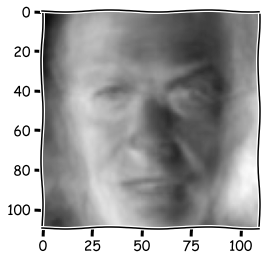

In [118]:
plt.imshow(256-a//256,cmap="gray")

<div class="alert alert-info">
    
16. Crea una función que devuelva la diferencia: donde $c_j$ es cada una de las imágenes del personaje en el conjunto de entrenamiento y $c_{nueva}$ es una imagen que no es de entrenamiento. Muestra en una gráfica la distancia por cada imagen. 
<div>

In [119]:
def diferencia(etiketa, b):
    distancias =[]
    for a in range(bigarr(eval(etiketa)).shape[-1]):
        E_j=linalg.norm(trset[:,a]-prset[:,b])/linalg.norm(trset[:,a])
        distancias.append(E_j)
    return distancias
    

#### Explicación de columnas e imágenes

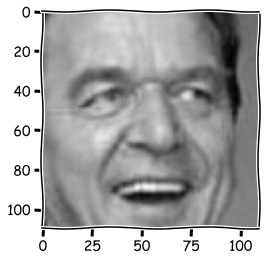

In [120]:
plt.imshow(trset[:,10].reshape(110,110),cmap="gray") #columna 10 del conjunto de entrenamiento

In [121]:
prset = bigarr(prueba)

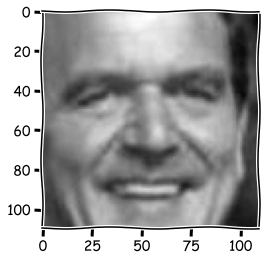

In [122]:
plt.imshow(prset[:,2].reshape(110,110),cmap="gray") #columna 2 del conjunto de prueba

In [123]:
hist_Bush=diferencia('George_W_Bush_tr', 2)
hist_Schroeder=diferencia('Gerhard_Schroeder', 2)
hist_Blair=diferencia('Tony_Blair', 2)
hist_Chretien=diferencia('Jean_Chretien', 2)
hist_Rumsfeld=diferencia('Donald_Rumsfeld', 2)
hist_Powell=diferencia('Colin_Powell', 2)
hist_Chavez=diferencia('Hugo_Chavez', 2)
hist_Koizumi=diferencia('Junichiro_Koizumi', 2)
hist_Sharon=diferencia('Ariel_Sharon', 2)
hist_Ashcroft=diferencia('John_Ashcroft', 2)

(array([ 3.,  7.,  9., 10.,  9.,  6.,  2.,  5.,  0.,  2.]),
 array([0.25265052, 0.27790536, 0.30316019, 0.32841503, 0.35366986,
        0.3789247 , 0.40417953, 0.42943437, 0.4546892 , 0.47994404,
        0.50519887]),
 <a list of 10 Patch objects>)

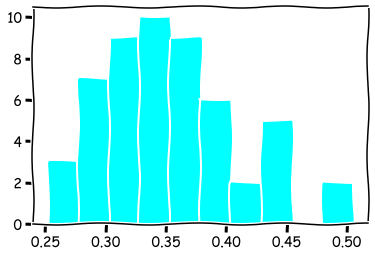

In [124]:
matplotlib.pyplot.hist(hist_Bush, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='cyan', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([11., 29., 31., 17., 12.,  4.,  4.,  0.,  0.,  1.]),
 array([0.25185068, 0.29256611, 0.33328154, 0.37399696, 0.41471239,
        0.45542782, 0.49614325, 0.53685868, 0.57757411, 0.61828954,
        0.65900497]),
 <a list of 10 Patch objects>)

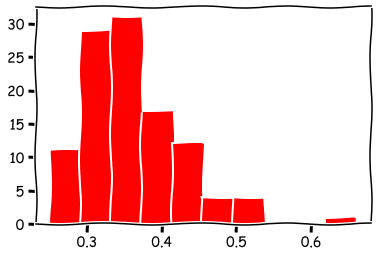

In [125]:
matplotlib.pyplot.hist(hist_Schroeder, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='red', 
                        label=None, 
                        stacked=False, 
                        data=None)


(array([11., 37., 42., 26., 16.,  7.,  4.,  0.,  0.,  1.]),
 array([0.25185068, 0.29256611, 0.33328154, 0.37399696, 0.41471239,
        0.45542782, 0.49614325, 0.53685868, 0.57757411, 0.61828954,
        0.65900497]),
 <a list of 10 Patch objects>)

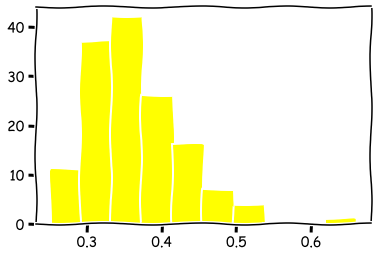

In [126]:
matplotlib.pyplot.hist(hist_Blair, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='yellow', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([ 3.,  7.,  9., 11.,  9.,  5.,  3.,  5.,  0.,  3.]),
 array([0.25265052, 0.27845661, 0.3042627 , 0.33006879, 0.35587488,
        0.38168097, 0.40748706, 0.43329315, 0.45909924, 0.48490533,
        0.51071142]),
 <a list of 10 Patch objects>)

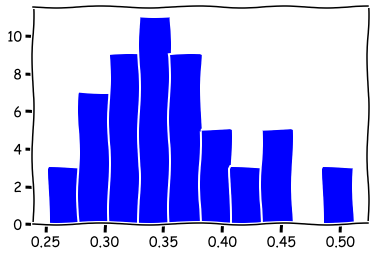

In [127]:
matplotlib.pyplot.hist(hist_Chretien, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='blue', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([11., 32., 35., 21., 12.,  5.,  4.,  0.,  0.,  1.]),
 array([0.25185068, 0.29256611, 0.33328154, 0.37399696, 0.41471239,
        0.45542782, 0.49614325, 0.53685868, 0.57757411, 0.61828954,
        0.65900497]),
 <a list of 10 Patch objects>)

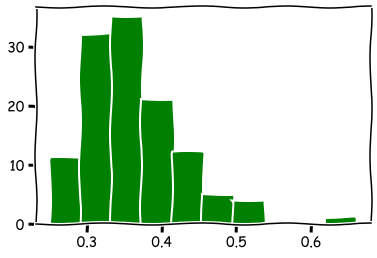

In [128]:
matplotlib.pyplot.hist(hist_Rumsfeld, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='green', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([17., 58., 68., 47., 28., 11.,  4.,  1.,  0.,  2.]),
 array([0.25185068, 0.29256611, 0.33328154, 0.37399696, 0.41471239,
        0.45542782, 0.49614325, 0.53685868, 0.57757411, 0.61828954,
        0.65900497]),
 <a list of 10 Patch objects>)

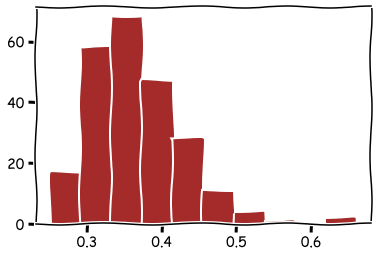

In [129]:
matplotlib.pyplot.hist(hist_Powell, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='brown', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([ 3.,  9., 12., 14., 11.,  8.,  4.,  6.,  1.,  3.]),
 array([0.25265052, 0.27845661, 0.3042627 , 0.33006879, 0.35587488,
        0.38168097, 0.40748706, 0.43329315, 0.45909924, 0.48490533,
        0.51071142]),
 <a list of 10 Patch objects>)

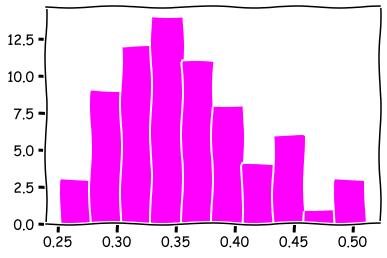

In [130]:
matplotlib.pyplot.hist(hist_Chavez, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='magenta', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([ 3.,  7., 12., 12.,  9.,  6.,  3.,  5.,  0.,  3.]),
 array([0.25265052, 0.27845661, 0.3042627 , 0.33006879, 0.35587488,
        0.38168097, 0.40748706, 0.43329315, 0.45909924, 0.48490533,
        0.51071142]),
 <a list of 10 Patch objects>)

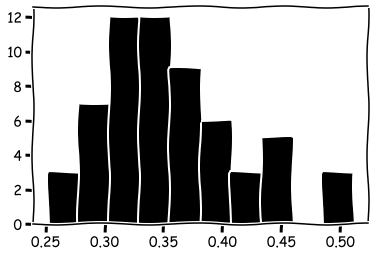

In [131]:
matplotlib.pyplot.hist(hist_Koizumi, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='black', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([ 4., 10., 13., 14., 14.,  8.,  4.,  6.,  1.,  3.]),
 array([0.25185068, 0.27773675, 0.30362283, 0.3295089 , 0.35539497,
        0.38128105, 0.40716712, 0.4330532 , 0.45893927, 0.48482534,
        0.51071142]),
 <a list of 10 Patch objects>)

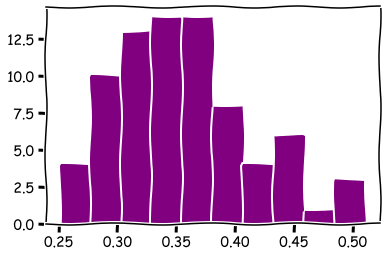

In [132]:
matplotlib.pyplot.hist(hist_Sharon, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='purple', 
                        label=None, 
                        stacked=False, 
                        data=None)

(array([ 3.,  7.,  9., 10.,  9.,  6.,  2.,  5.,  0.,  2.]),
 array([0.25265052, 0.27790536, 0.30316019, 0.32841503, 0.35366986,
        0.3789247 , 0.40417953, 0.42943437, 0.4546892 , 0.47994404,
        0.50519887]),
 <a list of 10 Patch objects>)

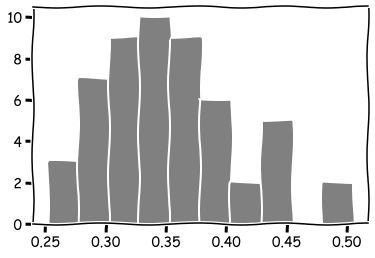

In [133]:
matplotlib.pyplot.hist(hist_Ashcroft, 
                        bins=None, 
                        range=None, 
                        density=False, 
                        weights=None, 
                        cumulative=False, 
                        bottom=None, 
                        histtype='bar', 
                        align='mid', 
                        orientation='vertical', 
                        rwidth=None, 
                        log=False, 
                        color='grey', 
                        label=None, 
                        stacked=False, 
                        data=None)

<div class="alert alert-info">
    
17. Utiliza una matriz de confusión para mostrar que tan efectivo es el reconocimiento de imágenes.   
<div>

In [134]:
def predecir(imagen):
    pred=[]
    for nombre in etiquetas:
            promedio = np.load("Promedios/"+nombre+".npy").reshape(110**2)
            proyeccion = np.dot(eigenfaces, encode(promedio,meanface,eigenfaces)) + (promedio/np.linalg.norm(promedio))
            dif = proyeccion - imagen
            E = np.linalg.norm(dif) / np.linalg.norm(proyeccion)
            pred.append(E)
    return pred

In [135]:
import sklearn.metrics as sk

et_verd=[]
et_pred=[]
for a in range(len(prueba)):
    et_verd.append(prueba[a].split('/')[1])
    et_pred.append(etiquetas[np.argmin(predecir(np.load(prueba[a]).reshape(110**2)))])

    
matriz = sk.confusion_matrix(et_verd, et_pred, labels=etiquetas)

In [136]:
matriz

array([[  0,   0,   0,   0,   0,   0,   0,   0,  56,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,  89,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,  67,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0, 178,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  18,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   7,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,  22,   0],
       [  7,   0,   0,   0,   0,   0,   0,   0, 470,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [137]:
suma=0
for i in range(len(matriz)):
    suma+=matriz[i,i]
print("Efectividad del "+str((suma/np.sum(matriz))*100)[:6]+"%")
print(matriz)
print("\n")

Efectividad del 50.755%
[[  0   0   0   0   0   0   0   0  56   0]
 [  2   0   0   0   0   0   0   0  89   0]
 [  0   0   0   0   0   0   0   0   2   0]
 [  1   0   0   0   0   0   0   0  67   0]
 [  5   0   0   0   0   0   0   0 178   0]
 [  0   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   7   0]
 [  2   0   0   0   0   0   0   0  22   0]
 [  7   0   0   0   0   0   0   0 470   0]
 [  0   0   0   0   0   0   0   0   0   0]]




In [74]:
import pandas as pd
unique_label = etiquetas
cmtx = pd.DataFrame(
    matriz, 
    index=['Real:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)
print(cmtx)

                        pred:Gerhard_Schroeder  pred:Tony_Blair  \
Real:Gerhard_Schroeder                       0               56   
Real:Tony_Blair                              0               89   
Real:Jean_Chretien                           0                2   
Real:Donald_Rumsfeld                         0               68   
Real:Colin_Powell                            0              178   
Real:Hugo_Chavez                             0               18   
Real:Junichiro_Koizumi                       0                7   
Real:Ariel_Sharon                            0               23   
Real:George_W_Bush                           0              473   
Real:John_Ashcroft                           0                0   

                        pred:Jean_Chretien  pred:Donald_Rumsfeld  \
Real:Gerhard_Schroeder                   0                     0   
Real:Tony_Blair                          0                     0   
Real:Jean_Chretien                       0                

# GRACIAS POR SU ATENCIÓN